In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("white")

# Import Transaction level data

In [4]:
df_trans = pd.read_csv('../data/train_trans.csv', index_col=0)

In [5]:
df_trans.columns

Index(['fullVisitorId', 'is_transaction', 'transactionRevenue', 'bounces',
       'hits', 'pageviews', 'visitNumber', 'is_source_googleplex',
       'is_source_direct', 'is_source_google', 'is_medium_referral',
       'is_medium_none', 'is_medium_organic', 'is_bayarea', 'Africa',
       'Americas', 'Asia', 'Europe', 'Oceania', 'next_session_1',
       'last_session_1', 'q1', 'q2', 'q3', 'q4', 'weekday', 'h_0_6', 'h_7_12',
       'h_13_17', 'h_18_23', 'browser_chrome', 'is_mobile', 'system_google'],
      dtype='object')

## Website visotors behavior

### pageviews

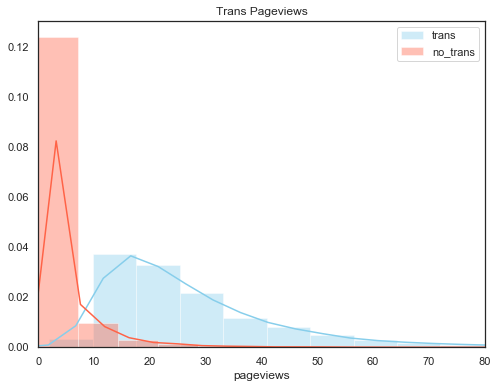

In [6]:
g = sns.distplot( df_trans[df_trans.is_transaction==1]['pageviews'] , bins = 60, color="skyblue", label="trans")
g = sns.distplot( df_trans[df_trans.is_transaction==0]['pageviews'] , bins = 60, color="tomato", label="no_trans")
g.set(xlim=(0,80))
plt.legend()
plt.title("Trans Pageviews")
g.figure.savefig("Final_Presentation_Images/trans_pageviews.png")

### hits

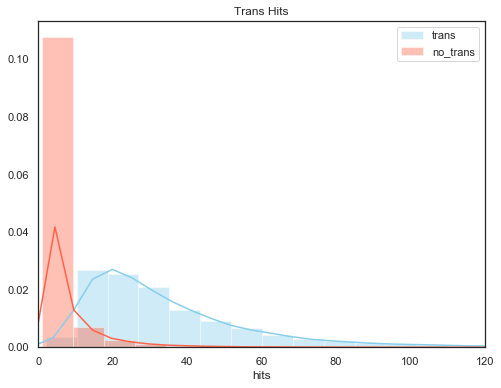

In [7]:
g = sns.distplot( df_trans[df_trans.is_transaction==1]['hits'] , bins = 60, color="skyblue", label="trans")
g = sns.distplot( df_trans[df_trans.is_transaction==0]['hits'] , bins = 60, color="tomato", label="no_trans")
g.set(xlim=(0,120))
plt.legend()
plt.title("Trans Hits")
g.figure.savefig("Final_Presentation_Images/trans_hits.png")

## sessions 

### last session

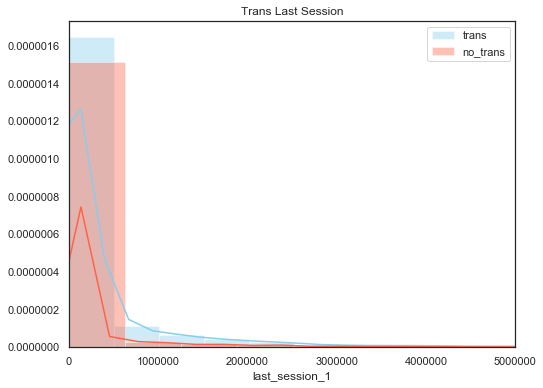

In [8]:
g = sns.distplot( df_trans[df_trans.is_transaction==1]['last_session_1'] , color="skyblue", label="trans")
g = sns.distplot( df_trans[df_trans.is_transaction==0]['last_session_1'] , color="tomato", label="no_trans")
g.set(xlim=(0,0.5*10**7))
plt.legend()
plt.title("Trans Last Session")
g.figure.savefig("Final_Presentation_Images/trans_last_session.png")

### next session

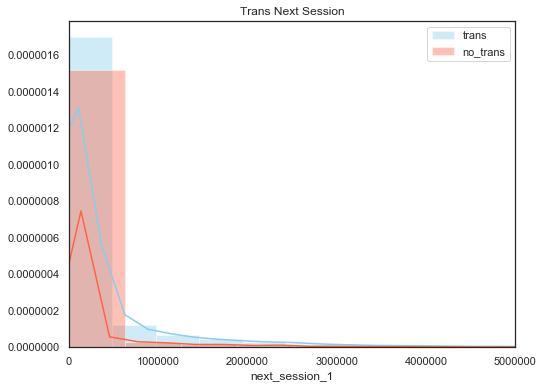

In [9]:
g = sns.distplot( df_trans[df_trans.is_transaction==1]['next_session_1'] , color="skyblue", label="trans")
g = sns.distplot( df_trans[df_trans.is_transaction==0]['next_session_1'] , color="tomato", label="no_trans")
g.set(xlim=(0,0.5*10**7))
plt.legend()
plt.title("Trans Next Session")
g.figure.savefig("Final_Presentation_Images/trans_next_session.png")

## Geographic

### Country Level: America

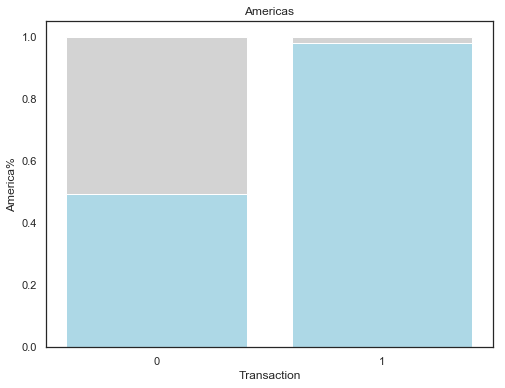

In [10]:
total = len(df_trans)
proportion_americas = [len(df_trans[(df_trans.Americas==1) & (df_trans.is_transaction == 0)])/len(df_trans[df_trans.is_transaction == 0]),
                              len(df_trans[(df_trans.Americas==1) & (df_trans.is_transaction == 1)])/len(df_trans[df_trans.is_transaction == 1])]
proportion_noamericas = [len(df_trans[(df_trans.Americas==0) & (df_trans.is_transaction == 0)])/len(df_trans[df_trans.is_transaction == 0]),
                              len(df_trans[(df_trans.Americas==0) & (df_trans.is_transaction == 1)])/len(df_trans[df_trans.is_transaction == 1])]


trans = [x for x in range(2)]

plt.bar(trans, np.array(proportion_noamericas), width=0.8, label='Americas', color='lightgray', bottom = proportion_americas)
plt.bar(trans, np.array(proportion_americas), width=0.8, label='Non-americas', color='lightblue')

plt.xticks(trans)
plt.ylabel("America%")
plt.xlabel("Transaction")
plt.title("Americas")
plt.ylim=1.0
plt.savefig("Final_Presentation_Images/Americas.png")

### is_googleplex

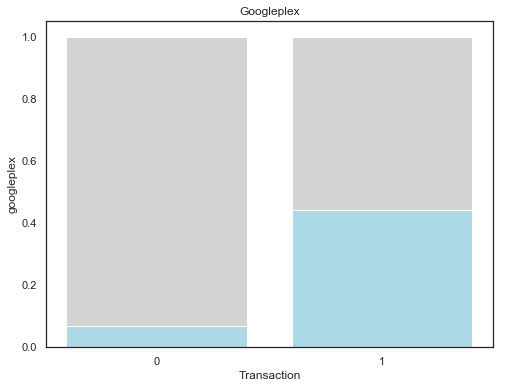

In [11]:
total = len(df_trans)
proportion_googleplex = [len(df_trans[(df_trans.is_source_googleplex==1) & (df_trans.is_transaction == 0)])/len(df_trans[df_trans.is_transaction == 0]),
                              len(df_trans[(df_trans.is_source_googleplex==1) & (df_trans.is_transaction == 1)])/len(df_trans[df_trans.is_transaction == 1])]
proportion_nogoogleplex = [len(df_trans[(df_trans.is_source_googleplex==0) & (df_trans.is_transaction == 0)])/len(df_trans[df_trans.is_transaction == 0]),
                              len(df_trans[(df_trans.is_source_googleplex==0) & (df_trans.is_transaction == 1)])/len(df_trans[df_trans.is_transaction == 1])]


trans = [x for x in range(2)]

plt.bar(trans, np.array(proportion_nogoogleplex), width=0.8, label='Non-Googleplex', color='lightgray', bottom = proportion_googleplex)
plt.bar(trans, np.array(proportion_googleplex), width=0.8, label='Googleplex', color='lightblue')

plt.xticks(trans)
plt.ylabel("googleplex")
plt.xlabel("Transaction")
plt.title("Googleplex")
plt.ylim=1.0
plt.savefig("Final_Presentation_Images/Googleplex.png")